2.1

In [1]:
import numpy as np

In [166]:
S = int(5)
sigma = 3
beta_0 = 0.96
beta = beta_0 ** 20

A = 1
alpha = 0.35
delta_0 = 0.05
delta = 1 - ((1 - delta_0) ** 20)

nvec = np.array([1, 1, 0.2])
L = nvec.sum()

SS_tol = 1e-13

f_params = (nvec, A, alpha, delta)

In [17]:
def util(c):
    u = (c ** (1 - sigma) - 1) / (1 - sigma)
    return u

def uprime(c):
    u_p = ((1 - sigma) * c ** (- sigma)) / (1 - sigma)
    return u_p

def w(b2, b3):
    w = (1 - alpha) * A *(((b2 + b3) / L) ** alpha)
    return w

def r(b2, b3):
    r = alpha * A *((L / (b2 + b3)) ** (1- alpha)) - delta
    return r

In [7]:
def feasible(f_params, bvec_guess):
    nvec = f_params[0]
    A = f_params[1]
    alpha = f_params[2]
    detla = f_params[3]
    k = bvec_guess.sum()
    K_cnstr = k <= 0
    w = (1 - alpha) * A *((bvec_guess.sum() / nvec.sum()) ** alpha)
    r = alpha * A *((nvec.sum() / bvec_guess.sum()) ** (1- alpha)) - delta
    c1 = nvec[0] * w - bvec_guess[0]
    c2 = nvec[1] * w + (1 + r) * bvec_guess[0] - bvec_guess[1]
    c3 = nvec[2] * w + (1 + r) * bvec_guess[1]
    c_cnstr = [c1 <= 0, c2 <= 0, c3 <= 0]
    b1 = c_cnstr[0]
    b2 = c_cnstr[2]
    if c_cnstr[1]:
        b1 = c_cnstr[1]
        b1 = c_cnstr[1]
    b_cnstr = [b1, b2]

    return b_cnstr, c_cnstr, K_cnstr     
    

In [8]:
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, np.array([1.0, 1.2]))
print(b_cnstr, c_cnstr, K_cnstr)

[True, False] [True, False, False] False


In [9]:
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, np.array([0.06, -0.001]))
print(b_cnstr, c_cnstr, K_cnstr)

[False, False] [False, False, False] False


In [10]:
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, np.array([0.1, 0.1]))
print(b_cnstr, c_cnstr, K_cnstr)

[False, False] [False, False, False] False


2.2

In [49]:
from scipy.optimize import fsolve
import time
import matplotlib.pyplot as plt

In [90]:
def b_func(z):
   b2 = z[0]
   b3 = z[1]

   F = np.empty((2))
   F[0] = uprime(w(b2, b3) - b2) - beta * (1 + r(b2, b3)) * uprime(w(b2, b3) + (1 + r(b2, b3)) * b2 - b3)
   F[1] = uprime(w(b2, b3) + (1 + r(b2, b3))* b2 -b3) - beta * (1 + r(b2, b3)) * uprime(1 + r(b2, b3) * b3 + 0.2 * w(b2, b3))
   return F

zguess = np.array([0.1, 0.1])
z = fsolve(b_func, zguess)
print(z)
b_ss = z
w_ss = w(b_ss[0], b_ss[1])
r_ss = r(b_ss[0], b_ss[1])
c1 = nvec[0] * w_ss - b_ss[0]
c2 = nvec[1] * w_ss + (1 + r_ss) * b_ss[0] - b_ss[1]
c3 = nvec[2] * w_ss + (1 + r_ss) * b_ss[1]
c_ss = np.array([c1, c2, c3])
K_ss = b_ss.sum()
C_ss = c_ss.sum()
Y_ss = C_ss + (K_ss - (1 - delta) * K_ss)
c_sp0 = [c1, c2]
c_sp1 = [c2, c3]
e1 = beta * (1 + r_ss) * uprime(c_sp1[0]) - uprime(c_sp0[0])
e2 = beta * (1 + r_ss) * uprime(c_sp1[1]) - uprime(c_sp0[1])
eulerr_ss = [e1, e2]
rcerr = Y_ss - C_ss - delta * K_ss

[0.0845011  0.19574564]


In [71]:
params = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)

In [91]:
def get_SS(params, bvec_guess, SS_graphs=True):
    beta = params[0]
    print(beta)
    start_time = time.clock()
    def b_func(z):
        b2 = z[0]
        b3 = z[1 ]

        F = np.empty((2))
        F[0] = uprime(w(b2, b3) - b2) - beta * (1 + r(b2, b3)) * uprime(w(b2, b3) + (1 + r(b2, b3)) * b2 - b3)
        F[1] = uprime(w(b2, b3) + (1 + r(b2, b3))* b2 -b3) - beta * (1 + r(b2, b3)) * uprime(1 + r(b2, b3) * b3 + 0.2 * w(b2, b3))
        return F
    z = fsolve(b_func, bvec_guess)
    b_ss = z
    w_ss = w(b_ss[0], b_ss[1])
    r_ss = r(b_ss[0], b_ss[1])
    c1 = nvec[0] * w_ss - b_ss[0]
    c2 = nvec[1] * w_ss + (1 + r_ss) * b_ss[0] - b_ss[1]
    c3 = nvec[2] * w_ss + (1 + r_ss) * b_ss[1]
    c_ss = np.array([c1, c2, c3])
    K_ss = b_ss.sum()
    C_ss = c_ss.sum()
    Y_ss = C_ss + (K_ss - (1 - delta) * K_ss)
    c_sp0 = [c1, c2]
    c_sp1 = [c2, c3]
    e1 = beta * (1 + r_ss) * uprime(c_sp1[0]) - uprime(c_sp0[0])
    e2 = beta * (1 + r_ss) * uprime(c_sp1[1]) - uprime(c_sp0[1])
    eulerr_ss = [e1, e2]
    rcerr_ss = Y_ss - C_ss - delta * K_ss
    ss_time = time.clock() - start_time
    
    ss_output = {
        'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
        'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
        'EulErr_ss': eulerr_ss, 'RCerr_ss': rcerr_ss,
        'ss_time': ss_time}

    if SS_graphs:
        s_3 = [0] + list(b_ss)
        age = np.linspace(1, S, S)
        plt.plot(age, c_ss, label='consumption')
        plt.plot(age, s_3, label='savings')
        plt.title('Steady_state consumption and savings')
        plt.xlabel('life age')
        plt.ylabel('distribution value')
        plt.legend()
    
    return ss_output

0.4420024338794074
{'b_ss': array([0.0845011 , 0.19574564]), 'c_ss': array([0.23151166, 0.26343613, 0.39485163]), 'w_ss': 0.3160127594960545, 'r_ss': 0.694285850065403, 'K_ss': 0.28024674120954973, 'Y_ss': 1.0695816475251076, 'C_ss': 0.8897994178400512, 'EulErr_ss': [-39.627646778825806, -42.533392612883404], 'RCerr_ss': 5.551115123125783e-17, 'ss_time': 0.0012586999999939508}


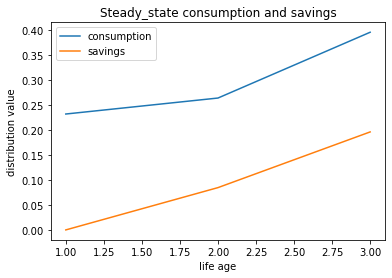

In [92]:
ss_output1 = get_SS(params, np.array([0.1, 0.1]))
print(ss_output1)

In [77]:
params_p = (0.55, sigma, nvec, L, A, alpha, delta, SS_tol)

0.55
{'b_ss': array([0.08128217, 0.18554018]), 'c_ss': array([0.22934768, 0.26632511, 0.3845195 ]), 'w_ss': 0.31062985203403803, 'r_ss': 0.7375941651401912, 'K_ss': 0.2668223495723997, 'Y_ss': 1.0513625761152057, 'C_ss': 0.8801922826484821, 'EulErr_ss': [-32.30165909894712, -36.12798546143203], 'RCerr_ss': -5.551115123125783e-17, 'ss_time': 0.0010479000000032102}


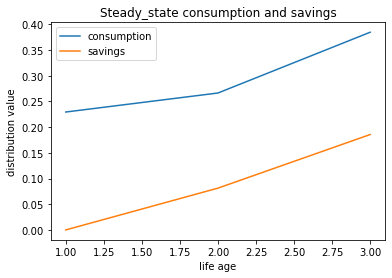

In [93]:
ss_output2 = get_SS(params_p, np.array([0.1, 0.1]))
print(ss_output2)

The more patient discount value leads to smaller wage and larger interest rate, and then reducing savings in both the second and the third periods; more consumption occurs in the second period but it drops in the other two. Consciously, more patient individuals should lean more towards saving and then consume more in the later periods, however, it also cause changes to the steady-state wage and rent, therefore causing the optimization result to be adjusted.

2.3

In [151]:
T = 25
TPI_tol = 1e-13
maxiter = 200
mindist = 1e-9
xi = 0.99

bvec1 = np.array([0.8 * b_ss[0], 1.2 * b_ss[1]])
K1 = bvec1.sum()

In [153]:
def w_p(K):
    w = (1 - alpha) * A *(((K) / L) ** alpha)
    return w

def r_p(K):
    r = alpha * A *((L / (K)) ** (1- alpha)) - delta
    return r

def func_1(z):
    b3ip1 = z[0]
    F = np.empty((1))
    F[0] = uprime(wi + (1 + ri) * b2i - b3ip1) - beta * (1 + rip1) * uprime((1 + rip1) * b3ip1 + 0.2 * wip1)
    return F

def func_2(z):
    b2 = z[0]
    b3 = z[1]

    F = np.empty((2))
    F[0] = uprime(wi - b2) - beta * (1 + rip1) * uprime(wip1 + (1 + rip1) * b2 - b3)
    F[1] = uprime(wip1 + (1 + rip1) * b2 - b3) - beta * (1 + rip2) * uprime((1 + rip1) * b3 + 0.2 * wip2)
    return F

In [233]:
Kp_init = np.zeros(T + S - 2)
Kp_init[:T] = np.linspace(K1, K_ss, T)
Lpath = L * np.ones(T + S - 2)

iter_TPI = 0
dist = 10
Kp_new = Kp_init.copy()

Eulmax_path = []
RCmax_path = []

while (iter_TPI < maxiter) and (dist >= mindist):
    iter_TPI += 1
    print(iter_TPI)
    Kp_init = xi * Kp_new + (1 - xi) *Kp_init
    Kp_init[np.isnan(Kp_init)] = 0
    rpath = r_p(Kp_init)
    rpath[np.isnan(rpath)] = 0
    wpath = w_p(Kp_init)
    wpath[np.isnan(wpath)] = 0
    bpath = np.zeros(T + S - 2)
    Eul1path = np.zeros(T + S - 2)
    Eul2path = np.zeros(T + S - 2)
    RCpath = np.zeros(T + S - 2)
    cpath = [[1] * 3 for i in range((T + S - 2))]
    bpath = list(np.zeros(T + S - 2))
    bpath[0] = bvec1
    for i in range(T):
        ri, rip1, rip2 = rpath[i], rpath[i + 1], rpath[i + 2]
        wi, wip1, wip2 = wpath[i], wpath[i + 1], wpath[i + 2]
        b2i = bpath[i][0]
        b3ip1 = fsolve(func_1, np.array([0.1]))[0]
        b2ip1, b3ip2 = fsolve(func_2, np.array([0.1, 0.1]))
        bpath[i + 1] = np.array([b2ip1, b3ip1])
    Kp_new = np.zeros(T + S - 2)
    for i in range(T):
        cpath[i] = np.array([nvec[0] * wpath[i] - bpath[i][0],
                             nvec[1] * wpath[i] + (1 + rpath[i]) * bpath[i][0] - bpath[i][1],
                             nvec[2] * wpath[i] + (1 + rpath[i]) * bpath[i][1]])
    #print(cpath)
    for i in range(T):
        Eul1path[i] = np.abs(beta * (1 + rpath[i]) * uprime(cpath[i + 1][1]) - uprime(cpath[i][1]))
        Eul2path[i] = np.abs(beta * (1 + rpath[i]) * uprime(cpath[i + 1][2]) - uprime(cpath[i][2]))
        RCpath[i] = np.abs(cpath[i].sum() + (Kp_init[i] - (1 - delta) * Kp_init[i]) - cpath[i].sum() - delta * Kp_init[i])
        Kp_new[i] = bpath[i].sum()
    Eul1path[np.isnan(Eul1path)] = 0
    Eul2path[np.isnan(Eul2path)] = 0
    RCpath[np.isnan(RCpath)] = 0
    eu1, eu2 = Eul1path.max(), Eul2path.max()
    Eulmax_path.append((eu1, eu2))
    rc = RCpath.max()
    RCmax_path.append(rc)   
    
    dist = ((Kp_new[1:T] - Kp_init[1:T]) ** 2).sum()
    if dist <= 0.00001:
        print('signal')
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17

c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
c:\use


18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163

c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars



164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [212]:
Eulmax_path

[(74.97826327452385, 73.76473200605365),
 (84.24145324919192, 106.05885011048835),
 (89.49914864891784, 119.37022327372175),
 (96.29978258885969, 126.20833763157195),
 (105.71784794982659, 70.06730855755241),
 (94.25952011632478, 36.36901279040197),
 (108.09877910556753, 71.63675114972361),
 (95.16997538761836, 36.889854309715844),
 (108.47835069575748, 71.57145812462562),
 (95.36019049323036, 36.99332830211641),
 (108.53442521340357, 71.53053047718643),
 (95.31439545508726, 36.95551276265334),
 (108.43399866804923, 71.46884898920422),
 (95.17530076678898, 36.858097183619904),
 (108.21267696653481, 71.33456661116848),
 (94.81343408593365, 36.60144950692333),
 (107.64945003470308, 70.9937514088414),
 (93.89136625406367, 35.950540066319334),
 (106.23138355164363, 70.12824324641485),
 (91.56087545857781, 34.32003640588185),
 (98.86987756681592, 115.27111899413013),
 (98.1490078971366, 125.25993454923609),
 (97.95802939770732, 125.37711642792245),
 (97.97099225801003, 125.36006103736612),


In [213]:
RCmax_path

[5.551115123125783e-17,
 5.551115123125783e-17,
 5.551115123125783e-17,
 5.551115123125783e-17,
 0.1064430911676194,
 5.551115123125783e-17,
 4503599627370496.0,
 5.551115123125783e-17,
 0.10118261731342255,
 5.551115123125783e-17,
 4503599627370496.0,
 35184372088832.0,
 0.10112973036993032,
 4.163336342344337e-17,
 0.5,
 4.85722573273506e-17,
 33554432.0,
 35184372088832.0,
 549755813888.0,
 32.0,
 4096.0,
 35184372088832.0,
 33554432.0,
 524288.0,
 33554432.0,
 4.76837158203125e-07,
 6.938893903907228e-17,
 0.00390625,
 5.551115123125783e-17,
 4.163336342344337e-17,
 3.725290298461914e-09,
 3.552713678800501e-15,
 3.725290298461914e-09,
 3.552713678800501e-15,
 5.551115123125783e-17,
 5.551115123125783e-17,
 1.1102230246251565e-16,
 6.938893903907228e-17,
 0.10609444523067282,
 6.245004513516506e-17,
 0.10253211155134702,
 8.326672684688674e-17,
 0.10263036024552609,
 5.551115123125783e-17,
 0.10260531076771069,
 4.85722573273506e-17,
 549755813888.0,
 35184372088832.0,
 54975581388

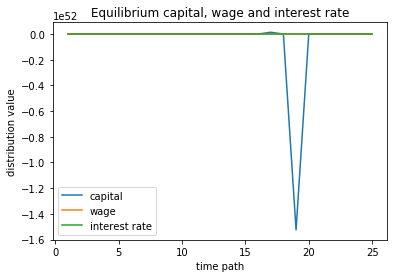

In [239]:
t = np.linspace(1, T , T )
plt.plot(t, Kp_new[:T], label='capital')
plt.plot(t, wpath[:T], label='wage')
plt.plot(t, rpath[:T], label='interest rate')
plt.title('Equilibrium capital, wage and interest rate')
plt.xlabel('time path')
plt.ylabel('distribution value')
plt.legend()